## 1. Packges included

In [1]:
import pandas as pd
from pandas import *
import numpy as np
import os
from datetime import *
import statistics as stat
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import csv
from zipfile import ZipFile
import math
import collections
import filecmp
import xml.etree.ElementTree as ET
import geopandas as gpd
from shapely import wkt

In [64]:
# the detailed data format is shown below

In [2]:
#set file direction
pathfile = 'G:/Shared drives/SUMO Seattle Simulation Model/Seattle Network/Bigger Seattle/Traffic signal/test/test_network_with_transit_n_veh_ped/data_for_calibration'
os.chdir(pathfile)
os.listdir()

['data_for_calibration.zip',
 'Travel_time',
 'Traffic_vol',
 'loop_eve_mor.csv',
 'sumo_data_correlation.csv',
 'selected_sensors_1.csv',
 'sumo_vol_cor.csv',
 'selected_road_seg.png',
 'SUMO_network.png',
 'selected_sensors_1',
 'veh_od_psrc.csv',
 'pseudo_taz.csv',
 'veh_od_convert.csv',
 'veh_od_psrc_Seattle.csv',
 'veh_od_convert_Seattle_Bellevue.csv',
 'veh_od_psrc_wh.csv',
 'veh_od_psrc5per.csv',
 'veh_od_psrc10per.csv',
 'veh_od_psrc15per.csv',
 'veh_od_psrc20per.csv',
 'veh_od_psrc25per.csv',
 'veh_od_psrc30per.csv',
 'veh_od_psrc35per.csv',
 'veh_od_psrc40per.csv',
 'veh_od_psrc45per.csv',
 'veh_od_psrc_wh5per.csv',
 'veh_od_psrc_wh10per.csv',
 'veh_od_psrc_wh15per.csv',
 'veh_od_psrc_wh20per.csv',
 'veh_od_psrc_wh25per.csv',
 'veh_od_psrc_wh30per.csv',
 'veh_od_psrc_wh35per.csv',
 'veh_od_psrc_wh40per.csv',
 'veh_od_psrc_wh45per.csv',
 'veh_od_psrc_convert.csv',
 'veh_od_psrc_convert5per.csv',
 'veh_od_psrc_convert10per.csv',
 'veh_od_psrc_convert15per.csv',
 'veh_od_psrc_co

In [3]:
def combine_mor_eve(mordict, evedict):
    mor = pd.DataFrame(mordict)
    mor['peak'] = 'mor'
    eve = pd.DataFrame(evedict)
    eve['peak'] = 'eve'
    frames = [mor, eve]
    dt = pd.concat(frames)
    return(dt)

## selected road segment
calibrated data sources include:
* Sensys data (SDOT)
* Tracflow data (WSDOT)
* NPMRDS data (WSDOT)

Selected sensors
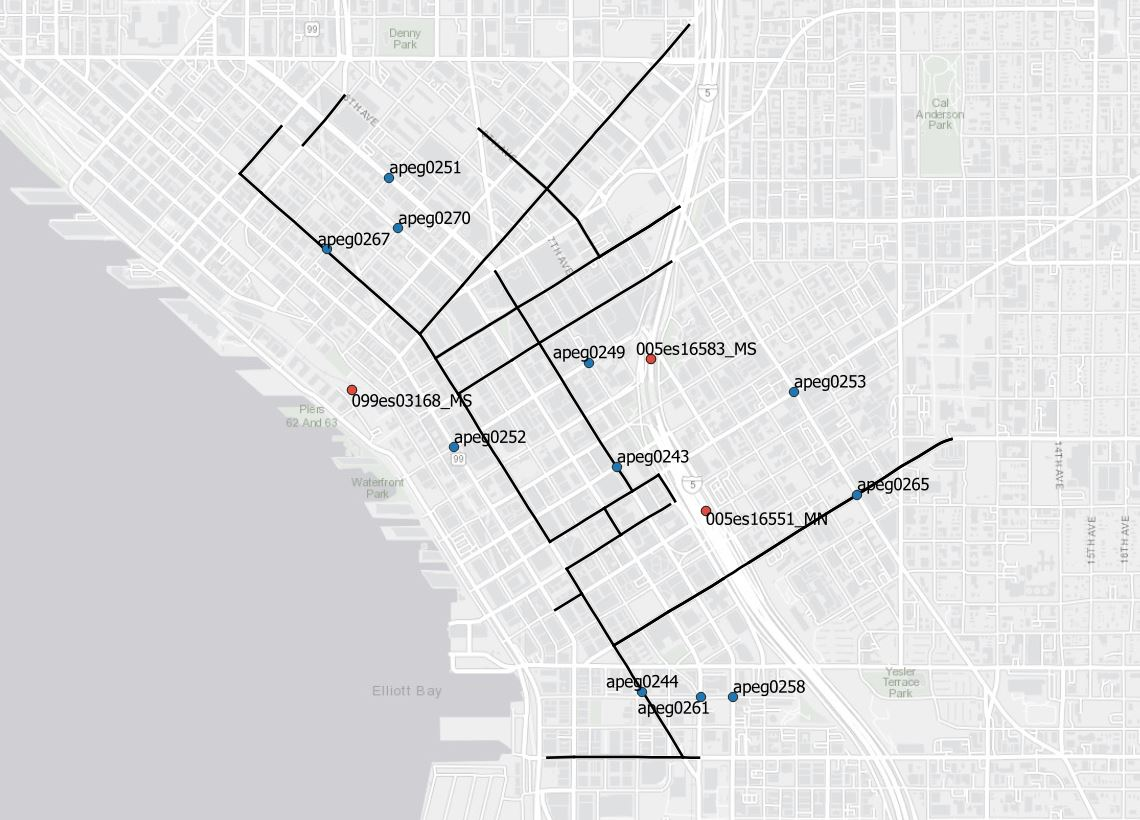

SUMO network 
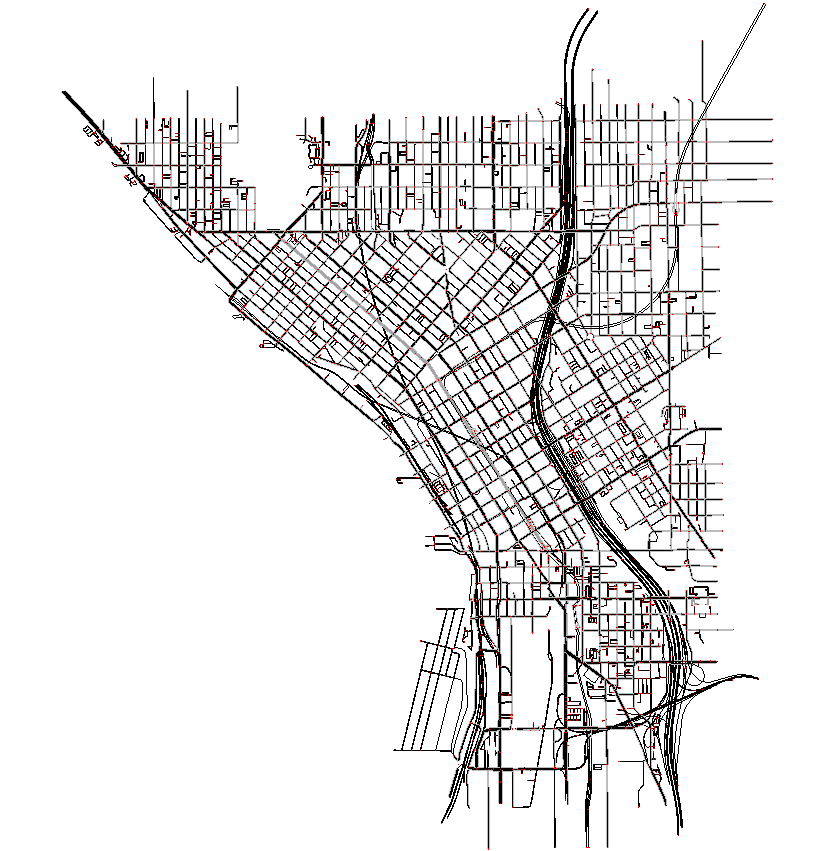

## Loop data processing

In [4]:
filepath = 'Traffic_vol/'
# get all the files under the given path
folders = os.listdir(filepath)
# check the zip file and unzip them all
for i in folders:
    if i[-3:] == 'zip' and 'Sensys' not in i:
        zip = ZipFile(filepath+i)
        zip.extractall(path=filepath)
        
#here we will only used avg vol for each loop sensys
selected_path = []
for i in os.listdir('Traffic_vol/'):
    if i[-6] == "m":
        selected_path.append('Traffic_vol/'+i)

for i in selected_path:
    dt_loop_vol = pd.read_excel(i)

In [5]:
dt_test = pd.read_excel(selected_path[0])
dt_test.head(3)

,Unnamed: 0,164,164.5,165,165.5,166,166.5,167,167.5
0,00:00:00,800.098639,863.641762,1014.631545,1142.923810,1235.568493,1274.495434,1313.422374,1352.349315
1,01:00:00,530.122449,565.739464,662.418902,733.423810,778.382801,790.292998,802.203196,814.113394
2,02:00:00,479.823129,529.934866,679.104725,678.539683,647.976915,661.307712,674.638508,687.969305


In [6]:
test_loop_ids = list(dt_test.columns)[1:]
vol = np.ones((len(test_loop_ids), len(dt_test.index)))
for i in range(len(test_loop_ids)):
    vol[i] = dt_test[test_loop_ids[i]].values.T
    vol[i] = vol[i]/sum(vol[i])

In [7]:
vol = np.mean(vol, axis=0)
vol = vol/sum(vol)

In [8]:
np.round(vol,3)
a = ''
for i in np.round(vol,3):
    a = a+str(i)+','

In [9]:
def get_loop_avg(selected_hour, excel_path, loop_dict):
    #get loop direction
    loop_dir = str()
    for i in excel_path[12:].split(' ')[:2]:
        loop_dir = loop_dir+i
    loop_dict[loop_dir] = {}
    dt = pd.read_excel(excel_path)
    
    loops_id = list(dt.columns)[1:]
    for loopid in loops_id:
        vol = list(dt.loc[selected_hour][loopid])        
        loop_dict[loop_dir][loopid] = sum(vol)/(np.count_nonzero(vol))
    return(loop_dict)

In [10]:
#define peak hour period
mor_peak = list(range(6,11))
eve_peak = list(range(15, 20))

In [11]:
loop_mor = {}
loop_eve = {}
for p in selected_path:
    loop_mor = get_loop_avg(mor_peak, p, loop_mor)
    loop_eve = get_loop_avg(eve_peak, p, loop_eve)

In [12]:
os.listdir()

['data_for_calibration.zip',
 'Travel_time',
 'Traffic_vol',
 'loop_eve_mor.csv',
 'sumo_data_correlation.csv',
 'selected_sensors_1.csv',
 'sumo_vol_cor.csv',
 'selected_road_seg.png',
 'SUMO_network.png',
 'selected_sensors_1',
 'veh_od_psrc.csv',
 'pseudo_taz.csv',
 'veh_od_convert.csv',
 'veh_od_psrc_Seattle.csv',
 'veh_od_convert_Seattle_Bellevue.csv',
 'veh_od_psrc_wh.csv',
 'veh_od_psrc5per.csv',
 'veh_od_psrc10per.csv',
 'veh_od_psrc15per.csv',
 'veh_od_psrc20per.csv',
 'veh_od_psrc25per.csv',
 'veh_od_psrc30per.csv',
 'veh_od_psrc35per.csv',
 'veh_od_psrc40per.csv',
 'veh_od_psrc45per.csv',
 'veh_od_psrc_wh5per.csv',
 'veh_od_psrc_wh10per.csv',
 'veh_od_psrc_wh15per.csv',
 'veh_od_psrc_wh20per.csv',
 'veh_od_psrc_wh25per.csv',
 'veh_od_psrc_wh30per.csv',
 'veh_od_psrc_wh35per.csv',
 'veh_od_psrc_wh40per.csv',
 'veh_od_psrc_wh45per.csv',
 'veh_od_psrc_convert.csv',
 'veh_od_psrc_convert5per.csv',
 'veh_od_psrc_convert10per.csv',
 'veh_od_psrc_convert15per.csv',
 'veh_od_psrc_co

In [13]:
dt = combine_mor_eve(loop_mor, loop_eve)
dt.to_csv('loop_eve_mor.csv')

## Sensys data

In [14]:
#get sensys data loc
sensys_loc = pd.read_excel('Traffic_vol/Location Lat Long.xlsx')
sensys_loc.head(3)

,Name,APEG,Screenline,Latitude,Longitude
0,Ballard Bridge,apeg0125,Flow Map,47.658978,-122.376148
1,SR 99 & S Lander St,apeg0225,NaN,47.579731,-122.339342
2,5th Ave & Spring St,apeg0243,NaN,47.607255,-122.332407


In [15]:
selected_sensys_path = []
for i in os.listdir('Traffic_vol/Sensys/'):
    selected_sensys_path.append('Traffic_vol/Sensys/'+i)


In [16]:
#check sensys data
dt_test = pd.read_csv(selected_sensys_path[0])
dt_test.head(3)

,Time,APEG,Sensor Zone,Occup (%),Vol,Speed med (mph),APEG.1,Sensor Zone.1,Occup (%).1,Vol.1,...,Sensor Zone.279,Occup (%).279,Vol.279,Speed med (mph).273,APEG.280,Sensor Zone.280,Occup (%).280,Vol.280,Speed med (mph).274,Unnamed: 1406
0,05/08/2018 00:00:00 PDT,apeg0125,0125S_NBT_1,0.52,51,38,apeg0125,0125S_NBT_2,4.31,97,...,sensorZone68,0.22,12,NaN,apeg6269,sensorZone75,0.97,73,NaN,NaN
1,05/08/2018 01:00:00 PDT,apeg0125,0125S_NBT_1,0.19,23,41,apeg0125,0125S_NBT_2,0.59,58,...,sensorZone68,0.31,17,NaN,apeg6269,sensorZone75,0.79,53,NaN,NaN
2,05/08/2018 02:00:00 PDT,apeg0125,0125S_NBT_1,0.32,22,43,apeg0125,0125S_NBT_2,0.49,35,...,sensorZone68,0.51,23,NaN,apeg6269,sensorZone75,1.16,72,NaN,NaN


In [17]:
# find volume corresponds to the sensys ids
def get_sensor_vol_relation(dt):
    colname = list(dt.columns)
    #get correspons sensor with vol symbol
    sensor_vol = {}
    for col in colname:
        if 'Sensor Zone' in col:
            if '.' not in col:
                sensor_vol[col] = 'Vol'
            else:
                sensor_vol[col] = 'Vol.'+ col.split('.')[1]
    sensors_dict = {}
        
    for col in colname:
        if 'Sensor Zone' in col:
            sensors = np.unique(dt[col])[0]
            if '_' in sensors:
                sensors = sensors.split('_')
                if len(sensors) >= 2:
                    sensors = sensors[0]+sensors[1]
                else:
                    print(sensors)
            if sensors not in sensors_dict:
                sensors_dict[sensors] = []
                sensors_dict[sensors].append(sensor_vol[col])
            else:
                sensors_dict[sensors].append(sensor_vol[col]) 
    return(sensors_dict)

#calculate the volume
def calculate_col(pathfile, vol_dict, hour_period):
    dt = pd.read_csv(pathfile)
    #from Tuesday and Thursday
    weekdays = [1,2,3]
    if datetime.strptime(dt['Time'][0][:-4],"%m/%d/%Y %H:%M:%S").weekday() in weekdays:
        sensor_dict = get_sensor_vol_relation(dt)
        if vol_dict == {}:
            for sensors in sensor_dict:
                vol_dict[sensors] = dt.loc[hour_period][sensor_dict[sensors]].values
        else:
            for sensors in sensor_dict:
                if sensors not in vol_dict:
                    vol_dict[sensors] = dt.loc[hour_period][sensor_dict[sensors]].values
                else:
                    vols = dt.loc[hour_period][sensor_dict[sensors]].values
                    vol_dict[sensors] = np.append(vol_dict[sensors], vols, axis=0)
    return(vol_dict)    

#calculate_vol_avg:
def calculate_avg_vol(vol_arr, sensys_id):
    #no zero/misssing values
    if len(np.unique(np.count_nonzero(vol_arr, axis=1))) == 1:
        edge_sum_vol = np.sum(vol_arr, axis=1)
        avg_vol = np.sum(edge_sum_vol)/len(edge_sum_vol)
        return(avg_vol)
    else:
        #calculate average for each lane and then add them up
        edge_sum_vol = np.sum(vol_arr, axis=0)
        
        num_data = np.count_nonzero(vol_arr, axis=0)
        avg_vol = np.sum(edge_sum_vol[np.nonzero(edge_sum_vol)]/num_data[np.nonzero(num_data)])
        return(avg_vol)

In [18]:
sensys_vol_dict_mor = {}
sensys_vol_dict_eve = {}

for path in selected_sensys_path:
    sensys_vol_dict_mor = calculate_col(path, sensys_vol_dict_mor, mor_peak)
    sensys_vol_dict_eve = calculate_col(path, sensys_vol_dict_eve, eve_peak)

In [19]:
sensys_vol_mor = {}
sensys_vol_eve = {}
sensys_vol = {}

for i in sensys_vol_dict_mor.keys():
    sensys_vol_mor[i] = calculate_avg_vol(sensys_vol_dict_mor[i], i)
    sensys_vol_eve[i] = calculate_avg_vol(sensys_vol_dict_eve[i], i)
    
sensys_vol['mor'] = sensys_vol_mor
sensys_vol['eve'] = sensys_vol_eve
sensys_vol = pd.DataFrame(sensys_vol)

In [20]:
null_sensor = []
for i in sensys_vol_mor.keys():
    if sensys_vol_mor[i] == 0 :
        if i[:4] not in null_sensor:
            if len(i) >= 4:
                null_sensor.append(i[:4])
            else:
                null_sensor.append(i)


In [21]:
#get sensors in downtown Seattle
selected_sensors = pd.read_csv('Traffic_vol/selected_sensors.csv')

non_available_ids = []
for sensorids in selected_sensors['APEG']:
    if sensorids[4:] in null_sensor:
        non_available_ids.append(sensorids)
selected_sensors = selected_sensors[selected_sensors['APEG']!=non_available_ids[0]]

selected_sensors.head(3)

,Name,APEG,Screenline,Latitude,Longitude
0,5th Ave & Spring St,apeg0243,NaN,47.607255,-122.332407
1,2nd Ave S & Washington St,apeg0244,NaN,47.601027,-122.331377
2,6th Ave & Union St,apeg0249,NaN,47.610141,-122.333560


In [22]:
#divide the direction for each sensor
sensors = list(selected_sensors['APEG'].values)

sensor_directions = {}
for i in sensys_vol_mor.keys():
    dir_keys = 'apeg'+i[:4]
    if len(i) >= 4 and dir_keys in sensors:
        if dir_keys not in sensor_directions:
            sensor_directions[dir_keys] = []
            sensor_directions[dir_keys].append(i[-3:])
        else:
            sensor_directions[dir_keys].append(i[-3:])

dir_labels = []
label = []
for i in sensors:
    if i in sensor_directions:
        if len(sensor_directions[i]) > 1:
            labels = i
            for j in sensor_directions[i]:
                labels = labels+'_'+j
        else:
            labels = i+'_'+sensor_directions[i][0]
        dir_labels.append(labels)
        label.append(1)
    else:
        dir_labels.append(i+'_no_dir')
        label.append(0)
        
selected_sensors['dir_label'] = dir_labels
selected_sensors['label'] = label

In [23]:
selected_sensors = selected_sensors[selected_sensors['label']==1]

In [24]:
selected_sensors.to_csv('selected_sensors_1')

In [25]:
del(sensys_vol_eve)
del(sensys_vol_mor)
sensys_vol.head(3)

,mor,eve
0125SNBT,1395.533333,2297.500000
0125SSBT,2079.000000,1887.733333
0243SSBT,553.833333,813.233333


## NPMRDS data
considering processing through Tableau

In [26]:
path = 'Travel_time/'

In [27]:
travel_time_mor = pd.read_csv(path+'mor.csv')
travel_time_eve = pd.read_csv(path+"eve.csv")
travel_time = pd.merge(travel_time_mor, travel_time_eve)

del(travel_time_mor)
del(travel_time_eve)

## sumo data processing

In [28]:
#provide sumo xml file to read
#file_path = '../Edge_data_sb.xml'
file_paths = []
for files in os.listdir('../'):
    if 'Edge' and 'per.xml' in files:
        file_paths.append('../'+files)

In [29]:
file_paths

['../Edge_veh_od_psrc_wh10per.xml',
 '../Edge_veh_od_psrc_wh20per.xml',
 '../Edge_veh_od_psrc_wh30per.xml',
 '../Edge_veh_od_psrc_wh40per.xml',
 '../Edge_veh_od_psrc_wh50per.xml',
 '../Edge_veh_od_psrc_wh60per.xml',
 '../Edge_veh_od_psrc_wh70per.xml',
 '../Edge_veh_od_psrc_wh80per.xml',
 '../Edge_veh_od_psrc_wh90per.xml',
 '../Edge_veh_od_psrc10per.xml',
 '../Edge_veh_od_psrc20per.xml',
 '../Edge_veh_od_psrc30per.xml',
 '../Edge_veh_od_psrc40per.xml',
 '../Edge_veh_od_psrc50per.xml',
 '../Edge_veh_od_psrc60per.xml',
 '../Edge_veh_od_psrc70per.xml',
 '../Edge_veh_od_psrc80per.xml',
 '../Edge_veh_od_psrc90per.xml']

In [30]:
#read mapping data
#read selected tmc data
selected_tmc = pd.read_csv('sumo_data_correlation.csv')
print(selected_tmc.head(3))

selected_sensys = pd.read_csv('sumo_vol_cor.csv')
print(selected_sensys.head(3))

selected_tmcid = np.unique(selected_tmc['data_id'])
selected_sensors = np.unique(selected_sensys['sensorid'])


#data mapping to travel time and sensys volume
#select test travel time
tested_travel_time = travel_time[travel_time['Tmc Code'].isin(selected_tmcid)]

#selected test volume
selected_index = []
sensys_id = list(sensys_vol.index)
for ids in sensys_id:
    if  'apeg'+ids[:4] in selected_sensors:
        selected_index.append(ids)

tested_sensys_vol = sensys_vol.loc[selected_index]
tested_sensys_vol.reset_index(inplace=True)

print(tested_travel_time.head(3))
print(tested_sensys_vol.head(3))

#get sumo road segment
test_sumoids = list(selected_tmc['sumo_id'].values)
test_sumoids.extend(list(selected_sensys['sumoid'].values))
test_sumoids =  np.unique(test_sumoids)

#read data collected from SUMO
#scan the data

#with open(file_path) as file:
#    for line in (file.readlines() [33:36]): 
#        print(line)
        
#loop data processing
#convert data format similar to sensys data
#find loop id from the selected loop list
selected_loop = pd.read_csv('sumo_vol_cor.csv')
sensorids = selected_loop['sensorid'].values.T
loopid = []
for ids in sensorids:
    if 'es' in ids:
        loopid.append(ids)
print(loopid)

loopdt = pd.DataFrame(loopid)
loopdt.columns = ['loopid']

def get_milepost(highway_dir, milepost, loop_vol_dict):
    diff = 100
    for mpl in loop_vol_dict[highway_dir]:
        diff_cur = abs(mpl-milepost)
        if diff_cur < diff:
            selected_mpl = mpl
            diff = diff_cur
    return(selected_mpl)

mor_val = []
eve_val = []
for ids in loopid:
    highway_keys = str(int(ids[:3]))+ids[-1]
    milepost = int(ids[5:10])/100
    selected_mpl = get_milepost(highway_keys, milepost, loop_mor)
    mor_val.append(loop_mor[highway_keys][selected_mpl])
    selected_mpl = get_milepost(highway_keys, milepost, loop_eve)
    eve_val.append(loop_eve[highway_keys][selected_mpl])

loopdt['mor'] = mor_val
loopdt['eve'] = eve_val
loopdt.head(3)

#get dir info from tmc_info
tmc_info = pd.read_csv('Travel_time/TMC_Identification.csv')
tmc_dir = tmc_info[['tmc', 'direction']][tmc_info['tmc'].isin(selected_tmcid)]
tmc_dir.head(3)

#create direction list to combine the data frame
direct_lst = []
for i in selected_tmc['data_id'].values:
    direct_lst.append(tmc_dir['direction'][tmc_dir['tmc'] == i].values[0])

selected_tmc['dir'] = direct_lst
selected_tmc.columns = selected_sensys.columns

connect_dt = pd.concat([selected_tmc, selected_sensys])
#del(selected_tmc)
#del(selected_sensys)b

      sumo_id    data_id
0     gneE458  114-08015
1   400679671  114-08015
2  22760467#2  114-08015
        sumoid  sensorid dir
0  462696719#2  apeg0244  sb
1    428230587  apeg0261  nb
2   22927950#2  apeg0258  sb
     Tmc Code    mor    eve
9   114-08015  154.1  201.6
10  114-08017  243.0  428.5
11  114-08018   13.5   21.5
      index         mor         eve
0  0243SSBT  553.833333  813.233333
1  0244SSBT  499.714493  759.261404
2  0249SNBT  374.333333  276.633333
['099es03168_MS', '099es03168_MN', '005es16583_MS', '005es16583_MN', '005es16551_MS', '005es16551_MN']


In [31]:
loopdt['loopid']

0    099es03168_MS
1    099es03168_MN
2    005es16583_MS
3    005es16583_MN
4    005es16551_MS
5    005es16551_MN
Name: loopid, dtype: object

In [32]:
sensorids

array(['apeg0244', 'apeg0261', 'apeg0258', 'apeg0258', 'apeg0243',
       'apeg0252', 'apeg0252', 'apeg0249', 'apeg0265', 'apeg0265',
       'apeg0253', 'apeg0253', 'apeg0267', 'apeg0270', 'apeg0251',
       '099es03168_MS', '099es03168_MN', '005es16583_MS', '005es16583_MN',
       '005es16551_MS', '005es16551_MN'], dtype=object)

In [33]:
for i in tested_sensys_vol['index'].values:
    selected_sensys

In [34]:
tested_travel_time['Tmc Code'].values

array(['114-08015', '114-08017', '114-08018', '114-08093', '114-08208',
       '114-08209', '114-10098', '114-10499', '114-10501', '114-10502',
       '114-10560', '114-10561', '114-10562', '114-11101', '114-11376',
       '114-11377', '114-11557', '114-15723', '114+08028', '114+08088',
       '114+08224', '114+08225', '114+08542', '114+08571', '114+10561',
       '114+10562', '114+10563', '114+11093', '114+11094', '114+11102',
       '114+15710', '114N10562'], dtype=object)

In [35]:
#read sumo data and check 
#get data from sumo.xml file
def read_xml_data(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    sumo_data = {}
    checked_value = {'entered':0, 'departed':0, 'arrived':0, 'left':0}
    #check enter, depart, arrive and left values
    for interval in root.findall('interval'):   
        begin_time = int(float(interval.get('begin'))/3600)
        #select mor peak only
        if begin_time>=7 and begin_time<10:
            end_time = int(float(interval.get('end'))/3600)
            time_period = str(begin_time)+'-'+str(end_time)
            #print collected time period
            #print(time_period)
            for edge in interval.findall('edge'):
                edgeid = edge.get('id')
                entered = float(edge.get('entered'))
                departed = float(edge.get('departed'))
                arrived = float(edge.get('arrived'))
                left = float(edge.get('left'))
                checked_val_cur = [entered, departed, arrived, left]
                checked_keys = list(checked_value.keys())
                for i in range(len(checked_val_cur)):
                    if checked_val_cur[i] > checked_value[checked_keys[i]]:
                        checked_value[checked_keys[i]] = checked_val_cur[i]

                if edgeid in test_sumoids:
                    if edgeid not in sumo_data:
                        sumo_data[edgeid] = {}
                        sumo_data[edgeid][time_period] = edge.attrib
                    else:
                        sumo_data[edgeid][time_period] = edge.attrib  

    print('check if any selected sumo id for calibration is missing from ' + file_path)
    missingids = []
    for sumoid in test_sumoids:
        if sumoid not in sumo_data.keys():
            print(sumoid)
            missingids.append(sumoid)
    print('missing info for calibration')
    if missingids != []:
        print(missingids)
    #connect_dt[['sensorid','dir']][connect_dt['sumoid'].isin(missingids)]

    #check travel time
    sumoid_tmc = selected_tmc['sumoid']
    travel_time_dt = {}
    mapped_sensor_index = []
    #get travel time for each road segment
    for tmc_segment in selected_tmcid:
        travel_time_dt[tmc_segment] = {}
        sumoids = selected_tmc[['sumoid']][selected_tmc['sensorid']==tmc_segment].values.T[0]
        for ids in sumoids:
            if ids not in missingids:
           # print(ids)
                for time in sumo_data[ids]:
                    if time not in travel_time_dt[tmc_segment]:
                        travel_time_dt[tmc_segment][time] = []
                        travel_time_dt[tmc_segment][time].append(float(sumo_data[ids][time]['traveltime']))
                    else:
                        travel_time_dt[tmc_segment][time].append(float(sumo_data[ids][time]['traveltime']))
            
                
    directions = selected_sensys['dir'].values.T
    for i in range(len(directions)):
        directions[i] = directions[i].upper()
    selected_sensors = selected_sensys['sensorid'].values.T
    for i in range(len(directions)):
        if 'es' not in selected_sensors[i]:
            mapped_sensor_index.append(selected_sensors[i][4:]+'S'+directions[i]+'T')
        else:
            mapped_sensor_index.append(selected_sensors[i])
    #print(selected_sensys['index'])
    #print(mapped_sensor_index)
    selected_sensys['index'] = mapped_sensor_index

    #get sensys volume for each intersection
    sensys_vol_dt = {}
    selected_sensors = selected_sensys['index'].values.T
    for sensys_id in selected_sensors:
        sensys_vol_dt[sensys_id] = {}
        sumoids = selected_sensys['sumoid'][selected_sensys['index']==sensys_id].values
        ## notice
        ## this condition could be deleted when rerun the sumo model
        for ids in sumoids:
            if ids not in missingids:
            #print(ids)
                for time in sumo_data[ids]:
                    if time not in sensys_vol_dt[sensys_id]:
                        sensys_vol_dt[sensys_id][time]={}
                        sensys_vol_dt[sensys_id][time]['vol_depart'] = []
                        sensys_vol_dt[sensys_id][time]['vol_depart_arrive'] = []
                        sensys_vol_dt[sensys_id][time]['vol_depart'].append(float(sumo_data[ids][time]['entered']))
                        sensys_vol_dt[sensys_id][time]['vol_depart_arrive'].append((float(sumo_data[ids][time]['entered'])+float(sumo_data[ids][time]['left']))/2)
                    else:
                        sensys_vol_dt[sensys_id][time]['vol_depart'].append(float(sumo_data[ids][time]['entered']))
                        sensys_vol_dt[sensys_id][time]['vol_depart_arrive'].append((float(sumo_data[ids][time]['entered'])+float(sumo_data[ids][time]['left']))/2)
    return(travel_time_dt, sensys_vol_dt) 

In [36]:
def calculate_hourly_travel_time(travel_time_dict):
    #convert dict to array
    time_keys = list(travel_time_dict.keys())

    row = len(travel_time_dict)
    
    data_len_time = []
    for time in time_keys:
        data_len_time.append(len(travel_time_dict[time]))
    
    if data_len_time != []:
        col = max(data_len_time)
    
        missing_index = []
        missing_time = []
        for i in range(len(data_len_time)):
            if data_len_time[i] != col:
                missing_index.append(i)
                missing_time.append(time_keys[i])

        if missing_index != []:
            for i in missing_time:
                time_keys.remove(i)  
        #print(time_keys)
        #print(len(time_keys))
        tt_arr = np.zeros((len(time_keys), col))
        j = -1
        for r in range(row):
            if r not in missing_index:
                j = j+1
                for c in range(col):
                    tt_arr[j][c] = travel_time_dict[time_keys[j]][c]       
            #calculate travel time
        return(np.mean(np.sum(tt_arr, axis=1)))
    if data_len_time == []:
        return(0)
    
    
def calculate_hourly_vol(vol_dict):
    if vol_dict == {}:
        return([None, None])
    else:
        time_keys = list(vol_dict.keys())
        vol_keys = list(vol_dict[time_keys[0]].keys())

        vol_mean = []

        for vol_key in vol_keys:
            row = len(time_keys)
            col = len(vol_dict[time_keys[0]][vol_key])
            cal_m = np.zeros((row, col))
            for r in range(row):
                for c in range(col):
                    cal_m[r][c] = vol_dict[time_keys[r]][vol_key][c]
            vol_mean.append(np.mean(np.sum(cal_m, axis=1)))
        return(vol_mean) 
    
def add_simulation_dt(id_order, simulation_data, cur_df, colname, vol_index = False):
    if vol_index == False:
        pass
    else:
        for i in range(len(id_order)):
            if 'L' in id_order[i]:
                id_order[i] = '0267SSBT'
    simulations_val = []
    for ids in id_order:
        simulations_val.append(simulation_data[ids])
    cur_df[colname] = simulations_val
    return(cur_df)

def get_GEH(true, simulated):
    E = simulated
    V = true
    GEH = (E-V)**2/((E+V)/2)
    return(GEH)

def get_validation_criteria(true, simulated, road_seg, filepath):
    #plt.hist([true, simulated],label=['true','simulated'])
    validate_road = []
    criteria = []
    
    #calculate GEH
    GEH = get_GEH(true, simulated)
    
    minus = simulated-true
    for i in range(len(true)):
        if abs(GEH[i]) <= 0.15:
            criteria.append(1)
            validate_road.append(road_seg[i])
            #print('GEH', road_seg[i], abs(GEH[i]))
        elif abs(minus[i]) <= 60:
            criteria.append(1)
            validate_road.append(road_seg[i])
            #print('minus', road_seg[i], abs(minus[i]))
        else:
            criteria.append(0)
    print('road satisfy validation criteria from '+filepath+': ', (len(validate_road)/len(road_seg)))
    print('# of tested road segments: ', len(selected_tmcid))
    return(criteria, GEH)

def get_validation_criteria_vol(true, simulated, sensorid, filepath):
    #plt.hist([true, simulated],label=['true','simulated'])
    validate_sensor = []
    criteria = []
    
    GEH = get_GEH(true, simulated)
    
    for i in range(len(true)):
        if abs(GEH[i]) <= 0.15:
            criteria.append(1)
            validate_sensor.append(sensorid[i])
            #print('GEH', sensorid[i], abs(GEH[i]-1))
        else:
            criteria.append(0)
    print('road satisfy validation criteria vol from '+filepath+': ', (len(validate_sensor)/len(sensorid)))
    print('number of tested intersections: ', len(selected_sensors))
    return(criteria, GEH)

In [ ]:
for tmcid in selected_tmcid:
    if tmcid not in travel_time_dt:
        print(tmcid)

In [107]:
selected_sensors = list(sensys_vol_dt.keys())

In [45]:
def add_simulation_data(travel_time_dt, sensys_vol_dt, colname, col_crit, col_geh, filepath, tested_travel_time, tested_sensys_vol, loopdt):
    simulation_data = {'tt':{}, 'vol':{},'vol/2':{}}
    for tmcid in selected_tmcid: 
        simulation_data['tt'][tmcid] = calculate_hourly_travel_time(travel_time_dt[tmcid])

    vollst = []
    selected_sensors = list(sensys_vol_dt.keys())
    for sensorid in selected_sensors:
        vollst = calculate_hourly_vol(sensys_vol_dt[sensorid])
        simulation_data['vol'][sensorid] = vollst[0]
        simulation_data['vol/2'][sensorid] = vollst[1]    

    #compare the data with the current dataset
    #map the tmc
    tmcids = list(np.unique(tested_travel_time['Tmc Code']))
    sensor_ids = list(np.unique(tested_sensys_vol['index']))
    loop_ids = list(np.unique(loopdt['loopid']))

    tested_travel_time = add_simulation_dt(tmcids, simulation_data['tt'], tested_travel_time, colname, False)
    tested_sensys_vol = add_simulation_dt(sensor_ids, simulation_data['vol'], tested_sensys_vol, colname, True)
    loopdt = add_simulation_dt(loop_ids, simulation_data['vol'], loopdt, colname, False)
    
    #caclulate travel time criteria
    true = tested_travel_time['mor'].values.T
    simulated = tested_travel_time[colname].values.T
    road_seg = tested_travel_time['Tmc Code'].values.T
    
    tested_travel_time[col_crit], tested_travel_time[col_geh] = get_validation_criteria(true, simulated, road_seg, filepath)
    
    
    #caclulate traffic volumn criteria
    true = tested_sensys_vol['mor'].values.T
    simulated = tested_sensys_vol[colname].values.T

    tested_sensys_vol[col_crit],tested_sensys_vol[col_geh] = get_validation_criteria_vol(true, simulated, sensor_ids, filepath)
    
    true = loopdt['mor'].values.T
    simulated = loopdt[colname].values.T

    loopdt[col_crit], loopdt[col_geh] = get_validation_criteria_vol(true, simulated, sensor_ids, filepath)
    
    return(tested_travel_time, tested_sensys_vol, loopdt)


In [76]:
os.listdir()
selected_data = []
for i in os.listdir():
    if '_convert' in i and 'per' in i:
        selected_data.append(i)

In [77]:
selected_data

['Edge_veh_od_psrc_convert10per.xml',
 'Edge_veh_od_psrc_convert15per.xml',
 'Edge_veh_od_psrc_convert5per.xml',
 'Edge_veh_od_psrc_convert20per.xml']

In [78]:
selected_sensors

array(['005es16551_MN', '005es16551_MS', '005es16583_MN', '005es16583_MS',
       '099es03168_MN', '099es03168_MS', 'apeg0243', 'apeg0244',
       'apeg0249', 'apeg0251', 'apeg0252', 'apeg0253', 'apeg0258',
       'apeg0261', 'apeg0265', 'apeg0267', 'apeg0270'], dtype=object)

In [66]:
selected_data[0].split('_')[-1].split('.')[0][-5:]

'10per'

In [79]:
for pathfile in selected_data:
    travel_time_dt, sensys_vol_dt = read_xml_data(pathfile)
    colname = 'test_'+pathfile.split('_')[-1].split('.')[0][-5:]
    col_crit = colname+'_'+'crit'
    col_geh = colname+'_'+'geh'
    tested_travel_time, tested_sensys_vol, loopdt = add_simulation_data(travel_time_dt, sensys_vol_dt, colname, col_crit,\
                                                                        col_geh, files, tested_travel_time,\
                                                                       tested_sensys_vol, loopdt)

check if any selected sumo id for calibration is missing from Edge_veh_od_psrc_convert10per.xml
missing info for calibration
road satisfy validation criteria from ped_od.rou.xml:  0.0
# of tested road segments:  32
road satisfy validation criteria vol from ped_od.rou.xml:  0.0
number of tested intersections:  17
road satisfy validation criteria vol from ped_od.rou.xml:  0.0
number of tested intersections:  17


<ipython-input-36-5646857781a7>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_df[colname] = simulations_val
<ipython-input-45-b8589bb3d516>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested_travel_time[col_crit], tested_travel_time[col_geh] = get_validation_criteria(true, simulated, road_seg, filepath)


check if any selected sumo id for calibration is missing from Edge_veh_od_psrc_convert15per.xml
missing info for calibration
road satisfy validation criteria from ped_od.rou.xml:  0.0
# of tested road segments:  32
road satisfy validation criteria vol from ped_od.rou.xml:  0.0
number of tested intersections:  17
road satisfy validation criteria vol from ped_od.rou.xml:  0.0
number of tested intersections:  17
check if any selected sumo id for calibration is missing from Edge_veh_od_psrc_convert5per.xml
missing info for calibration
road satisfy validation criteria from ped_od.rou.xml:  0.0
# of tested road segments:  32
road satisfy validation criteria vol from ped_od.rou.xml:  0.0
number of tested intersections:  17
road satisfy validation criteria vol from ped_od.rou.xml:  0.0
number of tested intersections:  17
check if any selected sumo id for calibration is missing from Edge_veh_od_psrc_convert20per.xml
missing info for calibration
road satisfy validation criteria from ped_od.rou.x

In [83]:
tested_sensys_vol.columns

Index(['index', 'mor', 'eve', 'test_100', 'test_100_crit', 'test_100_geh',
       'test_10per', 'test_10per_crit', 'test_10per_geh', 'test_15per',
       'test_15per_crit', 'test_15per_geh', 'test_t5per', 'test_t5per_crit',
       'test_t5per_geh', 'test_20per', 'test_20per_crit', 'test_20per_geh'],
      dtype='object')

In [87]:
sensorids

array(['apeg0244', 'apeg0261', 'apeg0258', 'apeg0258', 'apeg0243',
       'apeg0252', 'apeg0252', 'apeg0249', 'apeg0265', 'apeg0265',
       'apeg0253', 'apeg0253', 'apeg0267', 'apeg0270', 'apeg0251',
       '099es03168_MS', '099es03168_MN', '005es16583_MS', '005es16583_MN',
       '005es16551_MS', '005es16551_MN'], dtype=object)

In [103]:
sensorid = list(sensorids[:-6])
sensorid.append(sensorid[-1])
sensorid.append(sensorid[-1])

In [105]:
tested_sensys_vol['sensorid']=sensorid

In [106]:
tested_sensys_vol[['sensorid','mor', 'test_t5per','test_10per','test_15per','test_20per']]

,sensorid,mor,test_t5per,test_10per,test_15per,test_20per
0,apeg0244,553.833333,363.333333,302.000000,287.000000,208.000000
1,apeg0261,499.714493,79.000000,123.666667,102.000000,58.666667
2,apeg0258,374.333333,148.000000,152.666667,187.666667,104.000000
3,apeg0258,916.533333,159.666667,141.333333,102.666667,112.000000
4,apeg0243,677.044828,203.000000,117.333333,162.000000,130.333333
5,apeg0252,251.900000,149.333333,89.000000,122.666667,90.666667
6,apeg0252,438.248485,130.333333,167.333333,148.333333,100.000000
7,apeg0249,715.300000,208.333333,177.000000,263.000000,208.666667
8,apeg0265,10.966667,51.666667,26.666667,29.333333,64.333333
9,apeg0265,306.300000,102.000000,91.000000,150.000000,86.333333


In [107]:
with open('G:\Shared drives\SUMO Seattle Simulation Model\Seattle Network\Bigger Seattle\Traffic signal\test\test_network_with_transit_n_veh_ped\Edge_veh_od_psrc_convert15per.xml') as f:
    print(f.readline())

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Shared drives\\SUMO Seattle Simulation Model\\Seattle Network\\Bigger Seattle\\Traffic signal\test\test_network_with_transit_n_veh_ped\\Edge_veh_od_psrc_convert15per.xml'

In [86]:
tested_travel_time[['mor','test_t5per','test_10per','test_15per','test_20per']]

,mor,test_t5per,test_10per,test_15per,test_20per
9,154.1,4282.843333,3628.136667,4001.243333,3152.256667
10,243.0,4960.126667,5736.670000,4734.916667,4180.163333
11,13.5,8610.466667,6694.596667,5699.466667,7023.253333
17,51.5,7999.896667,6779.900000,6376.273333,5193.280000
22,70.2,31908.236667,31298.086667,26757.676667,27051.420000
23,53.4,4136.723333,3225.153333,3125.163333,4378.663333
32,38.4,18565.056667,9687.263333,21142.070000,12078.393333
36,29.7,11268.820000,9020.783333,9163.400000,8511.626667
37,76.5,14341.396667,10647.256667,13069.230000,8323.116667
38,10.0,6752.093333,6444.316667,5586.803333,5611.506667


In [ ]:
for files in file_paths:
    travel_time_dt, sensys_vol_dt = read_xml_data(files)
    colname = files.split('_')[-1][:-4]
    col_crit = colname+'_'+'crit'
    col_geh = colname+'_'+'geh'
    tested_travel_time, tested_sensys_vol, loopdt = add_simulation_data(travel_time_dt, sensys_vol_dt, colname, col_crit,\
                                                                        col_geh, files, tested_travel_time,\
                                                                       tested_sensys_vol, loopdt)
   

In [119]:
check_val = []
check_val.append('Tmc Code')
check_val.append('mor')
for i in loopdt.columns:
    if 'per' in i and '_' not in i:
        check_val.append(i)

tested_travel_time[check_val]

,Tmc Code,mor,wh10per,wh20per,wh30per,wh40per,wh50per,wh60per,wh70per,wh80per,wh90per,psrc10per,psrc20per,psrc30per,psrc40per,psrc50per,psrc60per,psrc70per,psrc80per,psrc90per
9,114-08015,154.1,814.600000,1140.363333,249.403333,368.330000,19.860000,21.516667,21.223333,25.813333,33.946667,1948.470000,2434.980000,1978.803333,2387.356667,611.266667,688.103333,126.560000,20.966667,29.356667
10,114-08017,243.0,1435.863333,618.770000,662.856667,1249.110000,35.380000,35.480000,33.333333,32.733333,26.733333,4529.823333,4155.986667,3545.203333,3729.980000,848.173333,619.223333,134.560000,36.716667,32.193333
11,114-08018,13.5,1120.726667,1532.576667,906.606667,826.690000,72.643333,68.703333,72.606667,72.270000,75.490000,4840.986667,5198.716667,4563.113333,4855.756667,657.406667,613.750000,136.140000,69.863333,72.610000
17,114-08093,51.5,525.123333,1081.093333,1146.533333,413.136667,33.140000,29.883333,32.583333,40.536667,45.046667,3897.833333,4356.913333,4210.636667,4461.720000,643.870000,983.186667,67.183333,34.336667,49.085000
22,114-08208,70.2,9184.113333,6627.560000,2497.490000,3115.920000,217.890000,207.696667,216.203333,207.713333,218.000000,20648.703333,20185.460000,19184.920000,19259.950000,6407.560000,3347.316667,941.483333,220.613333,206.550000
23,114-08209,53.4,403.423333,564.590000,669.726667,312.890000,13.926667,19.783333,20.993333,42.715000,0.000000,2494.373333,2399.426667,2330.543333,2399.413333,587.126667,858.163333,126.136667,25.873333,0.000000
32,114-10098,38.4,2039.160000,3100.376667,475.500000,422.313333,87.253333,72.866667,73.850000,75.313333,97.766667,12781.083333,15158.736667,10112.196667,7118.896667,4346.880000,876.886667,167.250000,87.366667,79.650000
36,114-10499,29.7,782.000000,1225.930000,355.183333,752.870000,52.333333,49.483333,52.320000,54.596667,58.723333,13022.310000,7706.990000,10507.780000,5114.230000,795.706667,436.353333,49.396667,45.326667,62.726667
37,114-10501,76.5,1636.773333,1530.810000,606.720000,633.270000,134.560000,116.850000,132.720000,169.690000,165.670000,8801.666667,10910.623333,10413.700000,7043.543333,2344.636667,1763.590000,229.563333,130.250000,146.810000
38,114-10502,10.0,1607.750000,1571.626667,759.173333,941.796667,86.136667,89.773333,91.356667,112.063333,174.190000,4714.016667,3772.440000,4053.926667,4199.676667,1279.873333,761.973333,95.213333,71.423333,102.040000


In [120]:
check_val = []
check_val.append('Tmc Code')
for i in loopdt.columns:
    if 'per' in i and 'crit' in i:
        check_val.append(i)
tested_travel_time[check_val]

,Tmc Code,wh10per_crit,wh20per_crit,wh30per_crit,wh40per_crit,wh50per_crit,wh60per_crit,wh70per_crit,wh80per_crit,wh90per_crit,psrc10per_crit,psrc20per_crit,psrc30per_crit,psrc40per_crit,psrc50per_crit,psrc60per_crit,psrc70per_crit,psrc80per_crit,psrc90per_crit
9,114-08015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,114-08017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,114-08018,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1
17,114-08093,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1
22,114-08208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,114-08209,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1
32,114-10098,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1
36,114-10499,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1
37,114-10501,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0
38,114-10502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
check_val = []
check_val.append('mor')
for i in loopdt.columns:
    if 'per' in i and '_' not in i:
        check_val.append(i)
loopdt[check_val]

,mor,wh10per,wh20per,wh30per,wh40per,wh50per,wh60per,wh70per,wh80per,wh90per,psrc10per,psrc20per,psrc30per,psrc40per,psrc50per,psrc60per,psrc70per,psrc80per,psrc90per
0,2104.106966,109.000000,56.333333,78.666667,95.666667,71.000000,57.666667,56.333333,11.333333,2.000000,112.000000,96.666667,123.333333,78.666667,109.000000,167.000000,118.333333,84.666667,15.000000
1,2203.217901,412.333333,444.666667,380.000000,475.000000,135.000000,107.000000,113.000000,36.000000,2.666667,365.666667,279.333333,401.666667,304.000000,582.666667,510.000000,442.000000,185.666667,44.333333
2,4433.845818,640.666667,755.000000,766.000000,676.000000,319.666667,278.333333,267.666667,80.000000,6.333333,251.333333,196.000000,261.000000,199.000000,305.333333,245.666667,522.333333,374.666667,82.666667
3,5687.577191,873.666667,998.666667,1075.333333,1049.000000,510.666667,437.666667,393.666667,126.666667,10.666667,1018.333333,883.666667,932.333333,840.333333,1176.000000,1082.333333,1168.000000,593.333333,107.666667
4,2455.423871,720.666667,656.333333,792.000000,755.666667,392.000000,313.333333,270.000000,101.666667,9.666667,492.333333,487.666667,548.333333,523.000000,612.333333,680.000000,628.666667,441.000000,85.000000
5,5299.003651,421.000000,451.333333,549.000000,527.000000,405.000000,343.666667,304.000000,96.666667,9.000000,503.333333,369.333333,344.333333,327.000000,464.000000,491.000000,514.000000,508.666667,97.666667


In [ ]:
tested_sensys_vol[check_val]

## Simulation test summary with multiple ods

| tested od | % of travel time matched criteria | % of vol matched criteria |
| --- | --- | --- |
| no external od | 56.25 | 0 |
| all od from psrc | 0 | 0 |
| all work-home od from psrc | 5 | 0 |
| all od from Seattle & Bellevue | 0 | 5 |
| work-home od from Seattle & bellevue | 53.125 | 0 |

## revise OD data

In [ ]:
os.listdir()

In [ ]:
#psrc_od
len(pd.read_csv('veh_od_convert.csv').index)

In [ ]:
#assign value to specific od
def label_specific_od(dt_psrc, selected_taz, new_colname):
    ori = []
    for origin in dt_psrc['otaz']:
        if origin in selected_taz:
            ori.append(1)
        else:
            ori.append(-1)
    dest = []
    for destination in dt_psrc['dtaz']:
        if destination in selected_taz:
            dest.append(1)
        else:
            dest.append(-1)

    dt_psrc[new_colname[0]] = ori
    dt_psrc[new_colname[1]] = dest
    dt_psrc[new_colname[2]] = dt_psrc[new_colname[0]]+dt_psrc[new_colname[1]]
    return(dt_psrc)

#define a function to save od csv
def get_od_csv(mode_type, savepath, csvname, dt_psrc, savefile=True):
    dt_od = dt_psrc[['otaz','dtaz']][dt_psrc['decode']==mode_type]
    #get ods
    od = {}
    dt_od = dt_od.reset_index()
    for i in range(len(dt_od['otaz'])):
        odpair = str(dt_od['otaz'][i])+'_'+str(dt_od['dtaz'][i])
        if odpair not in od:
            od[odpair] = 1
        else:
            od[odpair] = od[odpair]+1
    if savefile==True:
        f = open(savepath+csvname, 'w')
        f.write('O, D, demand\n')
        for k in od:
            line = k.split('_')
            line.append(str(od[k]))
            line = ", ".join(line)
            f.write(line+'\n')
        f.close()
        print('convert to '+csvname+' done')
    else:
        return(od)

#read and revise od data
#read .tsv file
path = 'G:/My Drive/2020/sumo/2014/'
os.chdir(path)
dt_psrc = pd.read_csv('_trip.tsv', header = 0, sep='\t')

#get information we need
#get taz file
os.chdir(pathfile)
datapath = '../Taz_bigger_Seattle_all_transit.add.xml'
tree = ET.parse(datapath)
root = tree.getroot()
selected_taz = []
for taz in root.findall('taz'):
    tazid = taz.get('id')
    selected_taz.append(tazid)
    
for i in range(len(selected_taz)):
    selected_taz[i] = int(selected_taz[i])

In [ ]:
#conver dt_psrc_files
#select people opurp is home or is work
mode_keys = {1:'walk',2:'bike',3:'sov',4:'hov',5:'hov3+',6:'walk to transit',8:'school bus',0:'other'}
dt_psrc = dt_psrc[['otaz', 'dtaz', 'mode', 'opurp','dpurp']]

#dt_od = np.array(dt_psrc)
decode_mode = []
for mode_id in dt_psrc['mode']:
    #ped
    if mode_id == 1:
        decode_mode.append(1)
    #ped to transit
    elif mode_id == 6:
        decode_mode.append(2)
    #bike
    elif mode_id == 2:
        decode_mode.append(3)
    #veh
    elif mode_id in [3, 4, 5]:
        decode_mode.append(4)
    #other
    elif mode_id == 8:
        decode_mode.append(5)
    else:
        #print(mode_id)
        decode_mode.append(0)
        
dt_psrc['decode'] = decode_mode

In [ ]:
dt_psrc.head(3)

In [ ]:
dt_psrc_wh = dt_psrc[(dt_psrc['opurp'].isin([0,1])) & (dt_psrc['dpurp'].isin([0,1]))]

In [ ]:
#select od within downtown Seattle region
#select id
'''ori = []
for origin in dt_psrc['otaz']:
    if origin in selected_taz:
        ori.append(1)
    else:
        ori.append(-1)
dest = []
for destination in dt_psrc['dtaz']:
    if destination in selected_taz:
        dest.append(1)
    else:
        dest.append(-1)

dt_psrc['ori_id'] = ori
dt_psrc['dest_id'] = dest
dt_psrc['od'] = dt_psrc['ori_id']+dt_psrc['dest_id']'''

newcol = ['ori_id','dest_id','od']
dt_psrc = label_specific_od(dt_psrc, selected_taz, newcol)

dt_psrc_wh = label_specific_od(dt_psrc_wh, selected_taz, newcol)
#get od paid within the selected taz id
#select od which origin and dest both from downtown Seattle
#dt_psrc = dt_psrc[dt_psrc['od']==2]

In [ ]:
#save csv file
#get_od_csv(4, 'G:/Shared drives/SUMO Seattle Simulation Model/Seattle Network/Bigger Seattle/Traffic signal/test/test_network_with_transit_n_veh_ped/data_for_calibration/', 'veh_od_psrc.csv')

In [ ]:
dt_psrc_wh.head(3)

In [ ]:
#delete ods of which origin and destination not in tazs
dt_psrc = dt_psrc[dt_psrc['od']!=-2]
dt_psrc_wh = dt_psrc_wh[dt_psrc_wh['od']!=-2]
dt_psrc.head(3)

In [ ]:
#check if we have missing values
#read the Seattle and Bellevue taz data
Seattle_Bellevue_taz = pd.read_csv('../Seattle_Bellevue_region.csv')
Seattle_Bellevue_taz = Seattle_Bellevue_taz['TAZ'].values.T 

#ori_SB --> ori from Seattle and Bellevue
newcol = ['ori_sb','dest_sb','od_sb']
dt_psrc = label_specific_od(dt_psrc, Seattle_Bellevue_taz, newcol)

dt_psrc_wh = label_specific_od(dt_psrc_wh, Seattle_Bellevue_taz, newcol)

In [ ]:
#focus only on Seattle and Bellevue area
dt_psrc = dt_psrc[dt_psrc['od_sb']==2]

#focus only on work/home od from Seattle Bellevue are
dt_psrc_wh_sb = dt_psrc_wh[dt_psrc_wh['od_sb']==2]

In [ ]:
get_od_csv(4, '../', 'veh_od_psrc_Seattle_Bellevue.csv', dt_psrc, True)
get_od_csv(4, '../', 'veh_od_psrc_wh.csv', dt_psrc_wh, True)
get_od_csv(4, '../', 'veh_od_psrc_wh_Seattle_Bellevue.csv', dt_psrc_wh_sb, True)

In [ ]:
get_od_csv(4, '../', 'veh_od_psrc.csv', dt_psrc, True)

In [ ]:
#check missings
def check_miss(filepath):
    psrc_ods = pd.read_csv(filepath)
    psrc_ods.columns = ['O','D','demand']
    #check if number of tazs regarding origins and destinations
    print(len(np.unique(psrc_ods['O'])))
    print(len(np.unique(psrc_ods['D'])))
    #check if we have missing values
    print(psrc_ods[psrc_ods['demand']==0])

In [ ]:
check_miss('../veh_od_psrc_Seattle_Bellevue.csv')
check_miss('../veh_od_psrc_wh.csv')
check_miss('../veh_od_psrc_wh_Seattle_Bellevue.csv')

In [ ]:
check_miss('../veh_od_psrc.csv')

In [ ]:
#other data processing
#get downtown Seattle taz in sumo
#get information we need

#read taz data
psrc_taz = gpd.read_file('../taz2010.shp')

#get centroid points from taz
lat_psrc = []
lon_psrc = []
for polys in psrc_taz['geometry'].values:
    p = wkt.loads(str(polys))
    latlon = p.centroid.wkt
    latlon = latlon[5:].split(' ')
    lon = float(latlon[1][1:])
    lat = float(latlon[2][:-1])
    lat_psrc.append(lat)
    lon_psrc.append(lon)

psrc_taz['lat'] = lat_psrc
psrc_taz['lon'] = lon_psrc

psrc_taz['lat'] = psrc_taz['lat']/10000
psrc_taz['lon'] = psrc_taz['lon']/10000
psrc_taz.head(3)

In [ ]:
#select taz only in Seattle Bellevue region
#psrc_taz = psrc_taz[psrc_taz['TAZ'].isin(selected_Seattle_Bellvue)]

In [ ]:
#load the pseudo taz
pseudo_taz = pd.read_csv('pseudo_taz.csv')
pseudo_taz

In [ ]:
[395, 396, 397, 398] in sumo_taz

In [ ]:
#aggreagate taz
def check_taz_ids(ids, sumo_taz):
    return(ids in sumo_taz)

def assign_to_taz(taz, assigned_taz, taz_map, sumo_taz):
    for i in taz:
        if check_taz_ids(i, sumo_taz) == True:
            print('warning, taz already in sumo')
        else:
            if i not in taz_map:
                taz_map[i] = assigned_taz
    return(taz_map)

def convert_od_file(filepath, psrc_taz):
    psrc_ods = pd.read_csv(filepath)
    psrc_ods.columns = ['O','D','demand']
    # for nearby north and south taz
    # aggregate their neighbor taz to them
    #since the demand from the ferry is not very  much (< 25 per od pair)
    #we exclud the ferry demand
    excluded_ferry_taz = [445, 449, 478, 610, 633]
    #check the demand
    #for i in excluded_ferry_taz:
    #    print(i)
    #    print(np.sum(psrc_ods['demand'][psrc_ods['D']==i].values))
    #    print(np.sum(psrc_ods['demand'][psrc_ods['O']==i].values))

    psrc_ods = psrc_ods[~psrc_ods['O'].isin(excluded_ferry_taz)]
    psrc_ods = psrc_ods[~psrc_ods['D'].isin(excluded_ferry_taz)]
    
    datapath = '../Taz_bigger_Seattle_all_transit_with_pseudo_link.add.xml'
    tree = ET.parse(datapath)
    root = tree.getroot()
    sumo_taz = []
    for taz in root.findall('taz'):
        tazid = taz.get('id')
        sumo_taz.append(tazid)
    
    #create taz map
    taz_map = {}
    
    #print('checkids')
    taz_map = assign_to_taz([444], 446, taz_map, sumo_taz)
    taz_map = assign_to_taz([395, 396, 397, 398], 442, taz_map, sumo_taz)
    taz_map = assign_to_taz([399, 400], 440, taz_map, sumo_taz)
    taz_map = assign_to_taz([401, 402], 436, taz_map, sumo_taz)
    taz_map = assign_to_taz([403], 434, taz_map, sumo_taz)
    taz_map = assign_to_taz([405], 432, taz_map, sumo_taz)
    taz_map = assign_to_taz([407], 427, taz_map, sumo_taz)
    taz_map = assign_to_taz([408], 426, taz_map, sumo_taz)
    taz_map = assign_to_taz([633], 610, taz_map, sumo_taz)
    taz_map = assign_to_taz([655], 653, taz_map, sumo_taz)
    taz_map = assign_to_taz([656], 652, taz_map, sumo_taz)
    taz_map = assign_to_taz([657], 650, taz_map, sumo_taz)
    #print('manual check end')

    #convert sumotaz to int
    for i in range(len(sumo_taz)):
        if 'taz' not in sumo_taz[i]:
            sumo_taz[i] = int(sumo_taz[i])

    reassigned_taz = list(taz_map.keys())
    sumo_taz.extend(reassigned_taz)
    
    pseudo_loc = pseudo_taz['location'].values.T
    pseudotazs = pseudo_taz['pseudo_id'].values.T
    pseudo_mapping = {}
    for i in range(int(len(pseudo_loc)/2)):
        index_num = i*2
        loc = pseudo_loc[index_num][:-2]
        pseudo_mapping[loc] = []
        pseudo_mapping[loc].append(pseudotazs[i*2])
        pseudo_mapping[loc].append(pseudotazs[i*2+1])
    
    psrc_taz = psrc_taz[~psrc_taz['TAZ'].isin(excluded_ferry_taz)]
    lat_val = psrc_taz['lat'].values.T
    lon_val = psrc_taz['lon'].values.T
    tazs = psrc_taz['TAZ'].values.T
    
    #set up criteria to identify variables
    #for lat, the larger, the higher; for lon, the larger, the more right
    SR99N = [23.421669, 126.923911]
    I5N = [23.268797,  126.923911]
    East = [[23.102587, 128.492278],[22.09419, 128.492278]]
    I90 = [[21.981049, 127.666997],[14.21359,145.35695]]
    SR99S = [[21.367705, 126.803996],[16.068982,127.22979]]
    
    for i in range(len(tazs)):
        if tazs[i] not in sumo_taz:
            #sr99N
            if lat_val[i]>= SR99N[0] and lon_val[i]<=SR99N[1]:
                taz_map[tazs[i]] = 'SR-99N'
            #I5N
            elif lat_val[i]>= I5N[0] and lon_val[i]>=I5N[1]:
                taz_map[tazs[i]] = 'I-5N'
            #East
            elif lat_val[i]<=East[0][0] and lat_val[i]>=East[1][0] and lon_val[i]<=East[0][1]:
                taz_map[tazs[i]] = 'East'
            elif lat_val[i]<=I90[0][0] and lat_val[i]>=I90[1][0] and lon_val[i]>=I90[0][1] and lon_val[i]<=I90[1][1]:
                taz_map[tazs[i]] = 'I-90'
            elif lat_val[i]<=SR99S[0][0] and lat_val[i]>=SR99S[1][0] and lon_val[i]>=SR99S[0][1] and lon_val[i]<=SR99S[1][1]:
                taz_map[tazs[i]] = 'SR-99S'
            else:
                taz_map[tazs[i]] = 'I-5S'

    psrc_ods = psrc_ods[psrc_ods['O'].isin(tazs)]
    psrc_ods = psrc_ods[psrc_ods['D'].isin(tazs)]
    
    #convert od files
    ori = psrc_ods['O'].values.T
    dest = psrc_ods['D'].values.T

    convert_ori = []
    convert_dest = []
    convert_taz = list(taz_map.keys())

    for i in range(len(ori)):
        if ori[i] in convert_taz:
            mapped_dir = taz_map[ori[i]]
            if type(mapped_dir) == int:
                convert_ori.append(mapped_dir)
            else:
                convert_ori.append(pseudo_mapping[mapped_dir][0])
        else:
            convert_ori.append(ori[i])

        if dest[i] in convert_taz:
            mapped_dir = taz_map[dest[i]]
            if type(mapped_dir) == int:
                convert_dest.append(mapped_dir)
            else:
                convert_dest.append(pseudo_mapping[mapped_dir][1])
        else:
            convert_dest.append(dest[i])
            
    psrc_ods['cO'] = convert_ori
    psrc_ods['cD'] = convert_dest
    
    return(psrc_ods)

In [ ]:
psrc_taz_sb = psrc_taz[psrc_taz['TAZ'].isin(Seattle_Bellevue_taz)]

In [ ]:
od_sb = convert_od_file('../veh_od_psrc_Seattle_Bellevue.csv', psrc_taz_sb)
od_wh = convert_od_file('../veh_od_psrc_wh.csv', psrc_taz)
od_wh_sb = convert_od_file('../veh_od_psrc_wh_Seattle_Bellevue.csv', psrc_taz_sb)

In [ ]:
od_psrc = convert_od_file('../veh_od_psrc.csv', psrc_taz)

In [ ]:
def save_revised_od_file(od_dt, save_path):
    od_dt = od_dt[['cO','cD','demand']]
    od_dt.to_csv(save_path, index=False)

In [ ]:
save_revised_od_file(od_sb, '../veh_od_psrc_Seattle_Bellevue.csv')
save_revised_od_file(od_wh, '../veh_od_psrc_wh.csv')
save_revised_od_file(od_wh_sb, '../veh_od_psrc_wh_Seattle_Bellevue.csv')

In [ ]:
save_revised_od_file(od_psrc, '../veh_od_psrc.csv')

In [ ]:
for i in os.listdir('../'):
    if 'psrc' in i and 'sumocfg' in i:
        print(i)

In [ ]:
0.05*np.array(list(range(1,10)))

In [ ]:
od = pd.read_csv('veh_od_psrc.csv')

In [ ]:
#create differemt sumo demand
def assign_per_to_od(file_path):
    od = pd.read_csv(file_path)
    percentage_check = list(range(1,10))
    percentage_check = 0.05*np.array(percentage_check)
    
    for percent in percentage_check:
        colnames = list(od.columns)[-1]
        data_col = list(od.columns)[:2]
        demand = (1-percent)*od[[colnames]].values
        demand = np.rint(demand)
        colnames = colnames+'_minus_'+str(int(percent*100))+'per'
        od[colnames] = demand
        data_col.append(colnames)
        od[data_col].to_csv(file_path[:-4]+str(int(percent*100))+'per'+file_path[-4:], index=False) 
    print('od assigned done')
    

In [ ]:
#get the percentage filepath
percent_files = []
for files in os.listdir('../'):
    if 'veh_od_psrc' and 'per' in files:
        percent_files.append('../'+files)

In [ ]:
#generate the edge file to store the data
#write the bus route for .rou.xml
filename = 'bus_link_route.rou.xml'
f = open(filename, 'w')
f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
f.write('<routes xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/routes_file.xsd">\n')
#define bus type
f.write('<vType vClass="bus" accel="0.8" color="red" decel="3.5" guiShape="bus" id="bus" length="12" maxSpeed="70" sigma="0.7" width="2.5"/>\n')
f.write('<vType vClass="rail_urban" id="rail_urban"/>\n')

#write bus trips
#define the trips and let SUMO generate the route automatically

for k in range(len(write_dict)):
    f.write(write_dict[k][1])

f.write('</routes>')

f.close()

In [ ]:
assign_per_to_od('veh_od_psrc_convert.csv')

In [ ]:
assign_per_to_od('veh_od_psrc_wh.csv')

In [ ]:
convert_file = []
for i in os.listdir():
    if 'per' in i:
        convert_file.append(i)
convert_file

## revise route file and add segment into it

In [ ]:
#draft code
'''travel_time_dict = travel_time_dt['114+08028']
#convert dict to array
time_keys = list(travel_time_dict.keys())

row = len(travel_time_dict)
col = len(travel_time_dict[time_keys[0]])

#check if there is data missing:
missing_time = []
missing_index = []
for i in range(row):
    if col > len(travel_time_dict[time_keys[i]]):
        missing_time.append(time_keys[i])
        missing_index.append(i)
    elif col < len(travel_time_dict[time_keys[i]]):
        missing_time.append(time_keys[0])
        missing_index.append(0)
        col = len(travel_time_dict[time_keys[i]])

#print(missing_index)
#print(missing_time)
if missing_index != []:
    for i in missing_time:
        time_keys.remove(i)  
        
print(time_keys)
#print(col)
#print(len(time_keys))
tt_arr = np.zeros((len(time_keys), col))
j = -1
for r in range(row):
    if r not in missing_index:
        j = j+1
        for c in range(col):
            tt_arr[j][c] = travel_time_dict[time_keys[j]][c]       
#calculate travel time
#return(np.mean(np.sum(tt_arr, axis=1)))'''